In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## 1.) Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2.) Load the dataset 

In [3]:
df_train = pd.read_csv("/kaggle/input/spam-sms-classification/TrainDataset.csv")
df_test = pd.read_csv("/kaggle/input/spam-sms-classification/TestDataset.csv")

FileNotFoundError: [Errno 2] File /kaggle/input/spam-sms-classification/TrainDataset.csv does not exist: '/kaggle/input/spam-sms-classification/TrainDataset.csv'

In [4]:
train = df_train
test = df_test

In [5]:
df_train.head()

,v1,v2
0,spam,U were outbid by simonwatson5120 on the Shinco...
1,ham,Do you still have the grinder?
2,ham,No. Yes please. Been swimming?
3,ham,No de.am seeing in online shop so that i asked.
4,ham,"Faith makes things possible,Hope makes things ..."


In [6]:
df_train = df_train.rename(columns = {'v1':'class_label','v2':'message'})
df_test = df_test.rename(columns = {'v2':'message'})

In [7]:
df_train.head()

,class_label,message
0,spam,U were outbid by simonwatson5120 on the Shinco...
1,ham,Do you still have the grinder?
2,ham,No. Yes please. Been swimming?
3,ham,No de.am seeing in online shop so that i asked.
4,ham,"Faith makes things possible,Hope makes things ..."


In [8]:
df_train.shape

(4457, 2)

In [9]:
df_test.head()

,message
0,Prabha..i'm soryda..realy..frm heart i'm sory
1,"Jus chillaxin, what up"
2,Ok no prob. Take ur time.
3,Congrats! 2 mobile 3G Videophones R yours. cal...
4,Thankyou so much for the call. I appreciate yo...


In [10]:
df_test.shape

(1115, 1)

In [11]:
class_label = df_train['class_label']

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4457 entries, 0 to 4456
Data columns (total 2 columns):
class_label    4457 non-null object
message        4457 non-null object
dtypes: object(2)
memory usage: 69.8+ KB


## 3.) Exploratory Data Analysis

In [13]:
df_train.groupby('class_label').describe()

message                                                            \
              count unique                                                top   
class_label                                                                     
ham            3868   3659                             Sorry, I'll call later   
spam            589    534  Please call our customer service representativ...   

                  
            freq  
class_label       
ham           28  
spam           4

In [14]:
df_train['length'] = df_train['message'].apply(len)
df_train.head()

,class_label,message,length
0,spam,U were outbid by simonwatson5120 on the Shinco...,133
1,ham,Do you still have the grinder?,30
2,ham,No. Yes please. Been swimming?,30
3,ham,No de.am seeing in online shop so that i asked.,47
4,ham,"Faith makes things possible,Hope makes things ...",133


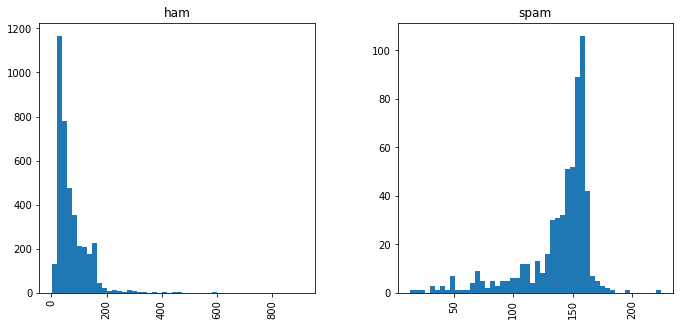

In [15]:
df_train.hist(column='length', by='class_label', bins=50,figsize=(11,5))
plt.show()

### Distribution of Target Variable

In [16]:
df_train.class_label.value_counts()

ham     3868
spam     589
Name: class_label, dtype: int64

In [17]:
df_train.class_label.value_counts(normalize=True)

ham     0.867848
spam    0.132152
Name: class_label, dtype: float64

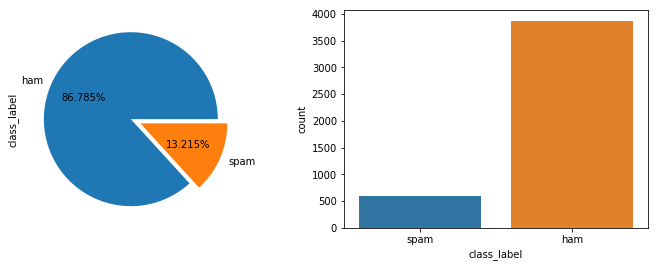

In [18]:
f,ax=plt.subplots(1,2, figsize=(12,4))
df_train.class_label.value_counts().plot.pie(explode=[0,0.12],autopct='%1.3f%%',ax=ax[0])
sns.countplot('class_label',data=df_train)
plt.show()

#### So, the dataset is imbalanced with respect to target variable.

## 4.) Preprocessing the data

In [19]:
df_train.drop('class_label',axis=1,inplace=True)
df_train.drop('length',axis=1,inplace=True)

In [20]:
## joined df_train is combination of train and test
df_train = df_train.append(df_test)

In [21]:
# store the SMS message
sms = df_train.message
sms.head()

0    U were outbid by simonwatson5120 on the Shinco...
1                       Do you still have the grinder?
2                       No. Yes please. Been swimming?
3      No de.am seeing in online shop so that i asked.
4    Faith makes things possible,Hope makes things ...
Name: message, dtype: object

### Using *regular expression* to replace email address, urls, phone number, money

In [22]:
# Replace email address with 'emailaddress'
final_sms = sms.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

In [23]:
# Replace urls with 'webaddress'
final_sms = final_sms.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

In [24]:
# Replace money symbol with 'money-symbol'
final_sms = final_sms.str.replace(r'£|\$', 'money-symbol')

In [25]:
# Replace 10 digit phone number with 'phone-number'
final_sms = final_sms.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number')

In [26]:
# Replace normal number with 'number'
final_sms = final_sms.str.replace(r'\d+(\.\d+)?', 'number')

In [27]:
# remove punctuation
final_sms = final_sms.str.replace(r'[^\w\d\s]', ' ')

In [28]:
# remove whitespace between terms with single space
final_sms = final_sms.str.replace(r'\s+', ' ')

In [29]:
# remove leading and trailing whitespace
final_sms = final_sms.str.replace(r'^\s+|\s*?$', ' ')

In [30]:
# change words to lower case
final_sms = final_sms.str.lower()

In [31]:
final_sms

0       u were outbid by simonwatsonnumber on the shin...
1                          do you still have the grinder 
2                            no yes please been swimming 
3         no de am seeing in online shop so that i asked 
4       faith makes things possible hope makes things ...
                              ...                        
1110    yo chad which gymnastics class do you wanna ta...
1111    god created gap btwn ur fingers so dat sumnumb...
1112         i m working technical support voice process 
1113                       i told your number to gautham 
1114                    well she s in for a big surprise 
Name: message, Length: 5572, dtype: object

#### NLTK 

In [32]:
import nltk

In [33]:
# remove stop words from SMS
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
final_sms = final_sms.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [34]:
# remove word stems using Porter stemmer
import nltk
ps = nltk.PorterStemmer()
final_sms = final_sms.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

In [35]:
final_sms

0       u outbid simonwatsonnumb shinco dvd plyr numbe...
1                                           still grinder
2                                           ye pleas swim
3                                   de see onlin shop ask
4       faith make thing possibl hope make thing work ...
                              ...                        
1110    yo chad gymnast class wanna take site say chri...
1111    god creat gap btwn ur finger dat sumnumb vri s...
1112                    work technic support voic process
1113                                  told number gautham
1114                                     well big surpris
Name: message, Length: 5572, dtype: object

In [36]:
from nltk.tokenize import word_tokenize

In [37]:
# creating a bag-of-words
all_words = []
for sms in final_sms:
    words = word_tokenize(sms)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)        

In [38]:
# print total number of words
print('Number of words: {}'.format(len(all_words)))

Number of words: 6534


In [39]:
# print 10 most common words
print('10 most common words: {}'.format(all_words.most_common(10)))

10 most common words: [('number', 2739), ('u', 1192), ('call', 672), ('go', 453), ('get', 451), ('ur', 385), ('symbolnumb', 325), ('gt', 318), ('lt', 316), ('åmoney', 303)]


In [40]:
temp = []
for (i,j) in all_words.most_common(1200):
    temp.append(i)

In [41]:
# use the top 1200 most common words as features
temp

['number',
 'u',
 'call',
 'go',
 'get',
 'ur',
 'symbolnumb',
 'gt',
 'lt',
 'åmoney',
 'come',
 'ok',
 'free',
 'know',
 'day',
 'love',
 'like',
 'time',
 'got',
 'good',
 'want',
 'text',
 'send',
 'txt',
 'need',
 'one',
 'today',
 'take',
 'see',
 'home',
 'stop',
 'think',
 'repli',
 'r',
 'lor',
 'sorri',
 'still',
 'tell',
 'numberp',
 'mobil',
 'n',
 'back',
 'da',
 'make',
 'k',
 'dont',
 'phone',
 'week',
 'pleas',
 'say',
 'hi',
 'new',
 'work',
 'later',
 'pl',
 'ask',
 'hope',
 'co',
 'miss',
 'meet',
 'msg',
 'messag',
 'dear',
 'night',
 'wait',
 'happi',
 'ì_',
 'c',
 'well',
 'thing',
 'much',
 'great',
 'claim',
 'min',
 'oh',
 'tri',
 'wat',
 'give',
 'hey',
 'na',
 'friend',
 'thank',
 'ye',
 'way',
 'www',
 'let',
 'e',
 'feel',
 'prize',
 'right',
 'wan',
 'tomorrow',
 'even',
 'alreadi',
 'pick',
 'cash',
 'said',
 'leav',
 'yeah',
 'realli',
 'care',
 'amp',
 'tone',
 'babe',
 'im',
 'b',
 'win',
 'morn',
 'find',
 'money',
 'life',
 'last',
 'sleep',
 'servic

#### TFIDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidf_model=TfidfVectorizer()
tfidf_vec=tfidf_model.fit_transform(final_sms)
tfidf_data=pd.DataFrame(tfidf_vec.toarray())
tfidf_data.head()

,0,1,2,3,4,5,6,7,8,9,...,6504,6505,6506,6507,6508,6509,6510,6511,6512,6513
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Seprating Columns

In [44]:
train.shape

(4457, 2)

In [45]:
test.shape

(1115, 1)

In [46]:
df_test = tfidf_data.iloc[-1115:]

In [47]:
df_train = tfidf_data.iloc[:4457]

In [48]:
df_train['class_label'] = class_label

In [49]:
df_train.shape

(4457, 6515)

In [50]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,6505,6506,6507,6508,6509,6510,6511,6512,6513,class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham


## 5.) Model Building

In [51]:
X = df_train.drop('class_label',axis=1)
Y = class_label

In [52]:
# splitting training data into train and validation using sklearn
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size=.2, random_state=42)

In [53]:
print(len(X_train))
print(len(X_test))

3565
892


### Import Evaluation metric

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

### RandomForest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc_mod = RandomForestClassifier(n_estimators=50,max_depth=12, random_state=101,
                             class_weight='balanced',verbose=1,n_jobs=-1)

In [56]:
rfc_mod.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=-1, oob_score=False,
                       random_state=101, verbose=1, warm_start=False)

In [57]:
y_pred_rfc = rfc_mod.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.1s finished


In [58]:
y_pred_rfc 

array(['ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
 

In [59]:
print("F1 Score :",f1_score(y_pred_rfc,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_rfc))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_rfc))

F1 Score : 0.9835627398704002
Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       764
        spam       0.99      0.89      0.94       128

    accuracy                           0.98       892
   macro avg       0.99      0.94      0.96       892
weighted avg       0.98      0.98      0.98       892

Confusion Matrix: 
 [[763   1]
 [ 14 114]]


In [60]:
rfc_predicted = rfc_mod.predict(df_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


In [61]:
test_predicted= pd.DataFrame()
test_predicted['class_label'] = rfc_predicted
test_predicted.to_csv('test_predicted_rfc.csv',index=False)

### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dectre_mod = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=5).fit(X_train, y_train)

In [64]:
dectre_mod.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [65]:
y_pred_dectre = dectre_mod.predict(X_test)

In [66]:
y_pred_dectre

array(['ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
 

In [67]:
print("F1 Score :",f1_score(y_pred_dectre,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_dectre))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_dectre))

F1 Score : 0.9651354972621732
Report:
               precision    recall  f1-score   support

         ham       0.97      0.99      0.98       764
        spam       0.93      0.81      0.87       128

    accuracy                           0.96       892
   macro avg       0.95      0.90      0.92       892
weighted avg       0.96      0.96      0.96       892

Confusion Matrix: 
 [[756   8]
 [ 24 104]]


In [68]:
dectre_predicted = dectre_mod.predict(df_test)

In [69]:
test_predicted= pd.DataFrame()
test_predicted['class_label'] = dectre_predicted
test_predicted.to_csv('test_predicted_DecisionTree.csv',index=False)

### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logreg_mod = LogisticRegression(random_state=42).fit(X_train, y_train)

In [72]:
y_pred_logreg = logreg_mod.predict(X_test)

In [73]:
y_pred_logreg

array(['ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham',
   

In [74]:
print("F1 Score :",f1_score(y_pred_logreg,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_logreg))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_logreg))

F1 Score : 0.9772565166769963
Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       764
        spam       0.99      0.84      0.91       128

    accuracy                           0.98       892
   macro avg       0.98      0.92      0.95       892
weighted avg       0.98      0.98      0.98       892

Confusion Matrix: 
 [[763   1]
 [ 20 108]]


In [75]:
predicted_test = logreg_mod.predict(df_test)

In [76]:
test_predicted = pd.DataFrame()
test_predicted['class_label'] = predicted_test
test_predicted.to_csv('test_predicted_logisticRgrsn.csv',index=False)